Now we need to check if we can calculate the optical path length difference in a simplified potential to obtain the phase change in the electron wave. We then need to check if we can calculate the phase difference by integrating the potential our electron passes through. We will try and do this for an electron with a long wavelength so we can easily plot the wavelength and phase shift as the electron refracts through the potential. We will also try and use a simple linear potential. 

In [1298]:
import sympy as sp
from sympy import Piecewise, DiracDelta
from sympy.core.numbers import pi, oo
from IPython.display import display
from latex2sympy2 import latex2sympy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget


Again set up constants and sympy symbols, and define the equation in sympy, and make a lambda function out of it.

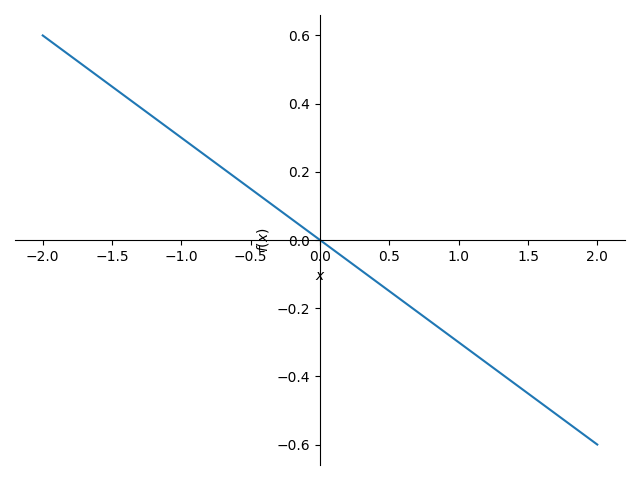

In [1299]:
#Initialise printing
sp.init_printing()

#Create mathematical symbols
x, y, z = sp.symbols('x y z')

#Make a linear potential along the x axis
phi_linear = -0.3*x 

#With a gaussian width of std 0.1 in the z-direction. This is so we can easily differentiate and integrate our potential
phi_linear_gauss = phi_linear*sp.exp(-z**2 / 0.1)

#Perform the phase integral
phase_integral = sp.integrate(phi_linear_gauss, (z, -oo, +oo))
phase_integral_lambda = sp.lambdify(x, phase_integral)

#Calculate the E-Field so we can plot it. 
Ex = -1*phi_linear_gauss.diff(x)
Ey = -1*phi_linear_gauss.diff(y)
Ez = -1*phi_linear_gauss.diff(z)

phi_linear_lambda = sp.lambdify([x, y, z], phi_linear_gauss)
E_lambda = sp.lambdify([x, y, z], [Ex, Ey, Ez], 'numpy')

sp.plot(phi_linear, (x, -2, 2))

In [1300]:
phase_integral

Plot the view of the electron as it moves towards the potential in the x-y plane. 

Text(0, 0.5, 'y (m)')

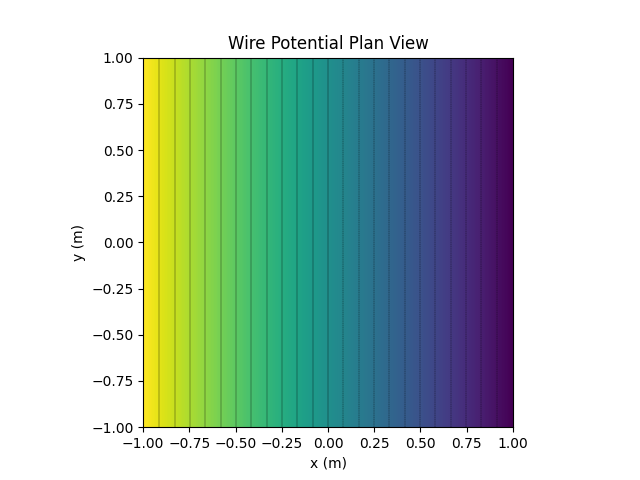

In [1301]:
z_ = np.linspace(-1, 1, 1000)
plan_figure, plan_ax = plt.subplots()
x_line, xstep = np.linspace(-1, 1, 300, retstep = True)
y_line, ystep = np.linspace(-1, 1, 300, retstep = True)
x_grid, y_grid = np.meshgrid(x_line, y_line)
z_grid = 0*np.ones(x_grid.shape)

potential_image = phi_linear_lambda(x_grid, y_grid, 0)
plan_ax.imshow(potential_image, extent=[-1, 1, -1, 1])
plan_ax.contour(potential_image, 25, linewidths = 0.25, colors = 'k', extent = [-1, 1, -1, 1], origin = 'upper')
plan_ax.set_title('Wire Potential Plan View')
plan_ax.set_xlabel('x (m)')
plan_ax.set_ylabel('y (m)')

Text(0, 0.5, 'x (m)')

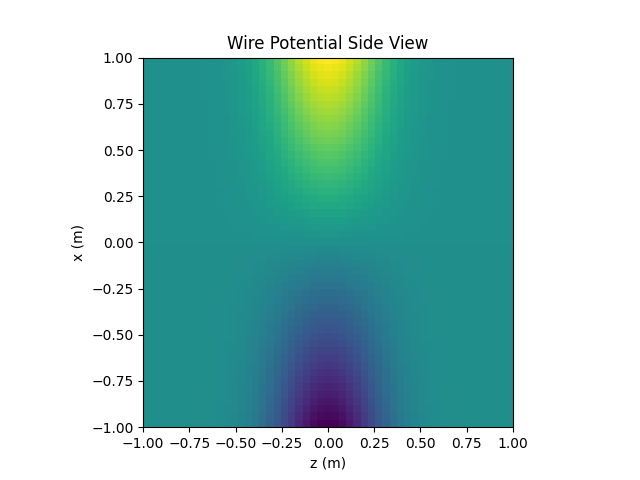

In [1302]:
zx_figure, zx_ax = plt.subplots()
z_line, zstep = np.linspace(-1, 1, 51, retstep = True)
x_line, xstep = np.linspace(-1, 1, 51, retstep = True)
z_grid, x_grid = np.meshgrid(x_line, z_line)
y_grid = 0*np.ones(x_grid.shape)
potential_image = phi_linear_lambda(x_grid, y_grid, z_grid)
zx_ax.imshow(potential_image, extent=[-1, 1, -1, 1], origin = 'upper')
zx_ax.set_title('Wire Potential Side View')
zx_ax.set_xlabel('z (m)')
zx_ax.set_ylabel('x (m)')

Text(0, 0.5, 'x (m)')

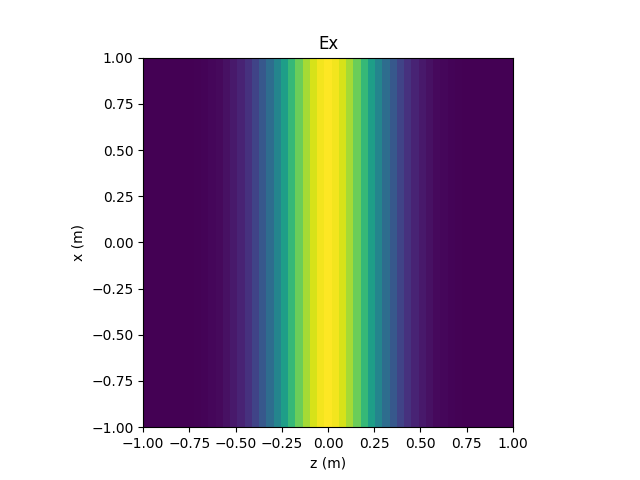

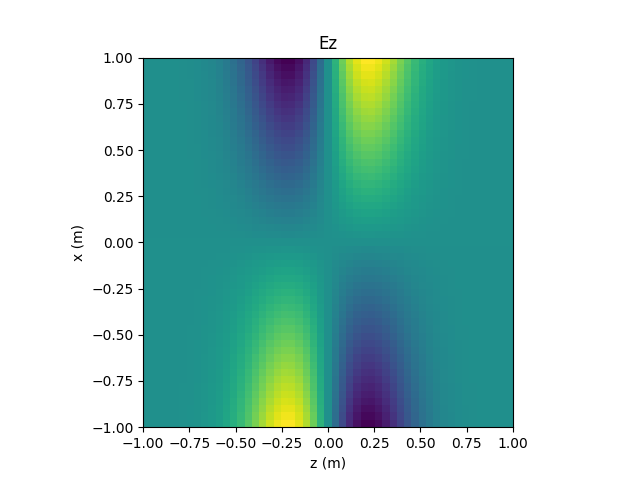

In [1303]:
Ex_figure, Ex_ax = plt.subplots()
Ez_line, Ezstep = np.linspace(-1, 1, 51, retstep = True)
Ex_line, Exstep = np.linspace(-1, 1, 51, retstep = True)
Ez_grid, Ex_grid = np.meshgrid(Ex_line, Ez_line)
Ey_grid = 0*np.ones(Ex_grid.shape)
efield_image = E_lambda(Ex_grid, Ey_grid, Ez_grid)[0]
Ex_ax.imshow(efield_image, extent=[-1, 1, -1, 1], origin = 'upper')
Ex_ax.set_title('Ex')
Ex_ax.set_xlabel('z (m)')
Ex_ax.set_ylabel('x (m)')

Ez_figure, Ez_ax = plt.subplots()
Ez_line, Ezstep = np.linspace(-1, 1, 51, retstep = True)
Ex_line, Exstep = np.linspace(-1, 1, 51, retstep = True)
Ez_grid, Ex_grid = np.meshgrid(Ex_line, Ez_line)
Ey_grid = 0*np.ones(Ex_grid.shape)
efield_image = E_lambda(Ex_grid, Ey_grid, Ez_grid)[2]
Ez_ax.imshow(efield_image, extent=[-1, 1, -1, 1], origin = 'upper')
Ez_ax.set_title('Ez')
Ez_ax.set_xlabel('z (m)')
Ez_ax.set_ylabel('x (m)')

In [1304]:
def odedopri(f,  x0,  y0,  x1,  tol,  hmax,  hmin,  maxiter, args=()):
    a21 = (1.0/5.0)
    a31 = (3.0/40.0)
    a32 = (9.0/40.0)
    a41 = (44.0/45.0)
    a42 = (-56.0/15.0)
    a43 = (32.0/9.0)
    a51 = (19372.0/6561.0)
    a52 = (-25360.0/2187.0)
    a53 = (64448.0/6561.0)
    a54 = (-212.0/729.0)
    a61 = (9017.0/3168.0)
    a62 = (-355.0/33.0)
    a63 = (46732.0/5247.0)
    a64 = (49.0/176.0)
    a65 = (-5103.0/18656.0)
    a71 = (35.0/384.0)
    a72 = (0.0)
    a73 = (500.0/1113.0)
    a74 = (125.0/192.0)
    a75 = (-2187.0/6784.0)
    a76 = (11.0/84.0)
    c2 = (1.0 / 5.0)
    c3 = (3.0 / 10.0)
    c4 = (4.0 / 5.0)
    c5 = (8.0 / 9.0)
    c6 = (1.0)
    c7 = (1.0)
    b1 = (35.0/384.0)
    b2 = (0.0)
    b3 = (500.0/1113.0)
    b4 = (125.0/192.0)
    b5 = (-2187.0/6784.0)
    b6 = (11.0/84.0)
    b7 = (0.0)
    b1p = (5179.0/57600.0)
    b2p = (0.0)
    b3p = (7571.0/16695.0)
    b4p = (393.0/640.0)
    b5p = (-92097.0/339200.0)
    b6p = (187.0/2100.0)
    b7p = (1.0/40.0)
    x = x0
    y = y0
    h = hmax
    X = np.zeros(maxiter)
    X[0] = x0
    Y = np.zeros((maxiter, len(y0)))
    Y[0] = y0
    
    #We need a special step counter because the ODE dormand prince 
    #method will do a step again with a smaller step size if the error is too large
    step = 1
    for i in range(maxiter):
       # /* Compute the function values */
       K1 = f(x,       y, *args)
       K2 = f(x + c2*h, y+h*(a21*K1), *args)
       K3 = f(x + c3*h, y+h*(a31*K1+a32*K2), *args)
       K4 = f(x + c4*h, y+h*(a41*K1+a42*K2+a43*K3), *args)
       K5 = f(x + c5*h, y+h*(a51*K1+a52*K2+a53*K3+a54*K4), *args)
       K6 = f(x + h, y+h*(a61*K1+a62*K2+a63*K3+a64*K4+a65*K5), *args)
       K7 = f(x + h, y+h*(a71*K1+a72*K2+a73*K3+a74*K4+a75*K5+a76*K6), *args)
       error = abs((b1-b1p)*K1+(b3-b3p)*K3+(b4-b4p)*K4+(b5-b5p)*K5 +
                   (b6-b6p)*K6+(b7-b7p)*K7)
       #Error in X controls tolerance
       error = max(error)
       # error control
       if error != 0.0:
           delta = 0.84 * pow(tol / error, (1.0/5.0))
       else:
           delta = np.inf
       if (error < tol):
          x = x + h
          X[step] = x
          y = y + h * (b1*K1+b3*K3+b4*K4+b5*K5+b6*K6)
          Y[step, :] = y
          step+=1
       if (delta <= 0.1):
          h = h * 0.1
       elif (delta >= 4.0):
          h = h * 4.0
       else:
          h = delta * h
       if (h > hmax):
          h = hmax
       if (x >= x1):
          print('reached end')
          break
       elif (x + h > x1):
          h = x1 - x
       elif (h < hmin):
          print('Below hmin')
          break
    return X, Y, step

In [1305]:
def make_potential_and_efield(phi, phi_0, x, y, z, eps):
    
    phi_hat = (phi)*(1+eps*(phi))
    
    #Include the initial potential of the electron from the gun. 
    phi_hat_wires_electron = phi_0 - phi_hat
    
    #Get E field function. Notice there is no negative sign, as the way hawkes uses phi_hat, there is no minus before it (Equation 3.22).
    dphi_hat_wires_electron_dx = phi_hat_wires_electron.diff(x)
    dphi_hat_wires_electron_dy = phi_hat_wires_electron.diff(y)
    dphi_hat_wires_electron_dz = phi_hat_wires_electron.diff(z)

    phi_hat_wires_electron_lambda = sp.lambdify([x, y, z], phi_hat_wires_electron, 'numpy')
    dphi_hat_wires_electron_lambda = sp.lambdify([x, y, z], [dphi_hat_wires_electron_dx, dphi_hat_wires_electron_dy, dphi_hat_wires_electron_dz], 'numpy')
    
    return phi_hat_wires_electron_lambda, dphi_hat_wires_electron_lambda

In [1306]:
e = -1#-1.60217662e-19 #unit C
m = 1#9.10938356e-31 #unit kg
h = 1#6.62607015e-34 #unit J . s 
c_l = 1#2.99792458e8 #unit m/s
eps_0_val = 1#8.85418782e-12 #permittivity unit F/m

phi_0 = 0.125 #unit V
v_0 = c_l*(1-(1-(e*phi_0)/(m*(c_l**2)))**(-2))**(1/2) #unit m/s
eta = (abs(e)/(2*m))**(1/2) #Constant from Hawkes
gamma = 1/(1-(v_0**2/c_l**2))**(1/2) #Gamma factor
eps = abs(e)/(2*m*c_l**2) #eps as defined in Hawkes, different from the permittivity of free space. 

In [1307]:
def trajectory_equation_of_motion(z, x, phi_hat_lambda, dphi_hat_lambda):
    
    p = np.sqrt(1+x[1]**2+x[3]**2) #obtain slope of ray
    phi_hat = phi_hat_lambda(x[0], x[2], z) #evaluate potential
    dphi_hat_x, dphi_hat_y, dphi_hat_z = dphi_hat_lambda(x[0], x[2], z) #evaluate the efield
    return np.array([x[1], (p**2)/(2*phi_hat)*(dphi_hat_x-x[1]*dphi_hat_z), x[3], (p**2)/(2*phi_hat)*(dphi_hat_y-x[3]*dphi_hat_z)]) #evaluate the velocities and accelerations, [vx, ax, vy, ay]

In [1308]:
phi_hat_lambda, dphi_hat_lambda = make_potential_and_efield(phi_linear_gauss, phi_0, x, y, z, eps)

In [1309]:
x0 = np.array([0, 0, 0, 0]) #x, x', y, y'
z0 = -1 #Initial z plane
zF = 1 #Final z plane

tol = 1e-12 #error tolerance in the calculation (error in force or velocity on one axis is no larger than tolerance)
max_step_size = 1e-1 #m
min_step_size = 1e-15 #m
z_out, x_out, steps = odedopri(trajectory_equation_of_motion,  z0,  x0,  zF,  tol ,  max_step_size,  min_step_size,  1000, args=(phi_hat_lambda, dphi_hat_lambda))

reached end


X positional deflection (m): 0.8059915000452055
Y positional deflection (m): 0.0


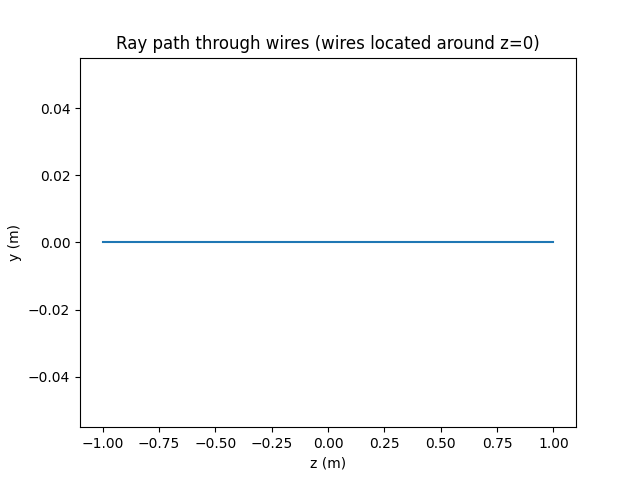

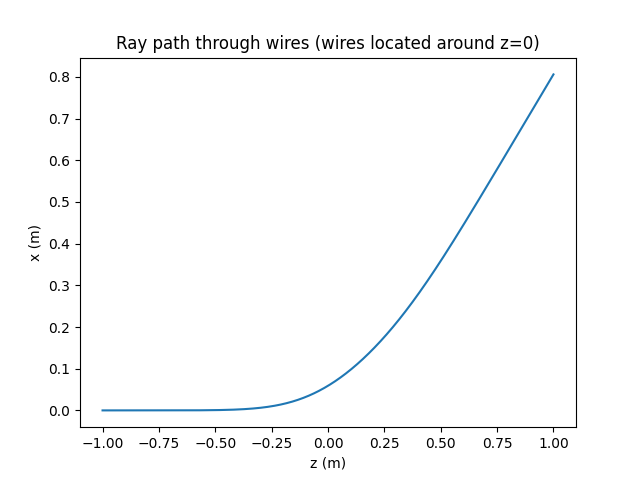

In [1310]:
plt.figure()
plt.plot(z_out[:steps], x_out[:steps, 2])
plt.title('Ray path through wires (wires located around z=0)')
plt.xlabel('z (m)')
plt.ylabel('y (m)')

plt.figure()
plt.plot(z_out[:steps], x_out[:steps, 0])
plt.title('Ray path through wires (wires located around z=0)')
plt.xlabel('z (m)')
plt.ylabel('x (m)')

print('X positional deflection (m):', abs(x_out[0, 0]-x_out[steps-1, 0]))
print('Y positional deflection (m):', abs(x_out[0, 2]-x_out[steps-1, 2]))


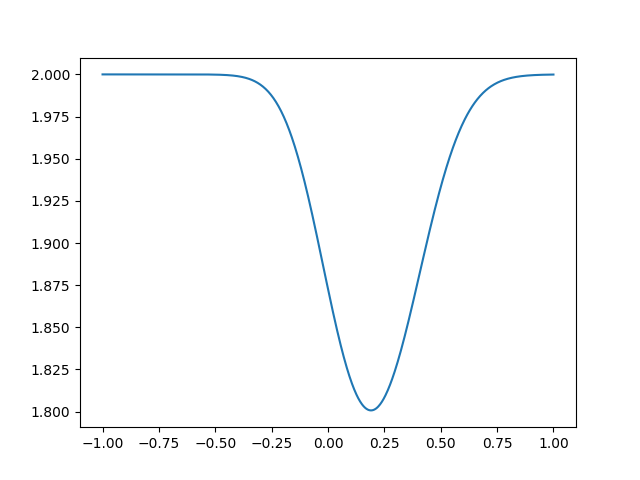

In [1311]:
x, y, z = x_out[:steps, 0], x_out[:steps, 0], z_out[:steps]
wavelengths = h/(2*abs(e)*m*phi_hat_lambda(x, y, z))**(1/2)

plt.figure()
plt.plot(z, wavelengths)


In [1312]:
wavelengths[0]

1.162803970111205 1.1628038896975799


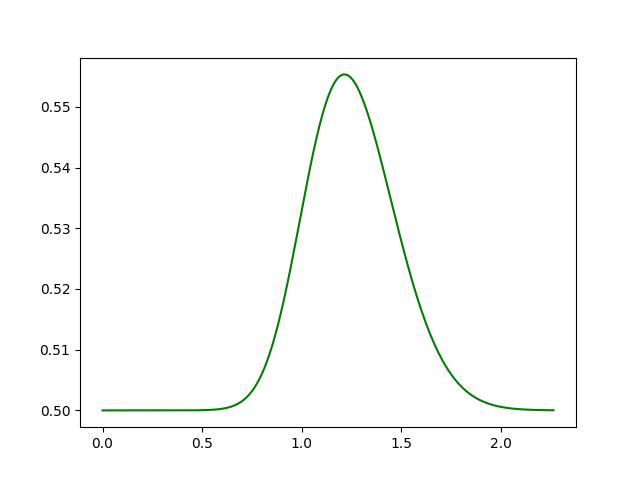

In [1313]:
from scipy.integrate import simpson
def optical_path_length(x, y, x_slope, y_slope, z, phi_hat_lambda):
    
    deltax, deltay, deltaz = np.diff(x), np.diff(y), np.diff(z) #get the differences between each coordinate
    s = np.cumsum(np.pad(np.sqrt(deltax**2+deltay**2+deltaz**2), (1, 0), "constant")) #path length calculation, with 0 appended to the start
    p = np.sqrt(1+x_slope**2+y_slope**2)
    n = np.sqrt(2*phi_hat_lambda(x, y, z))
    m = n*p #refractive index of electron calculation from hawkes
    z -= z[0]
    opl_m = simpson(m, z) #perform numerical integration to obtain OPL. I think this is correct. This should be a stationary point if the ray is a path (dOPL ~ 0)?
    opl_n = simpson(n, s)
    return s, n, m, opl_m, opl_n

s, n, m, opl_m, opl_n = optical_path_length(x_out[:steps, 0], x_out[:steps, 2], x_out[:steps, 1], x_out[:steps, 3], z_out[:steps], phi_hat_lambda)
p = np.sqrt(1+x_out[:steps, 1]**2+x_out[:steps, 3]**2)
print(opl_m, opl_n)

plt.figure()
#plt.plot(s, m/p, '-r')
plt.plot(s, n, '-g')


In [1314]:
simpson(n, s)

In [1315]:
opl_one = abs(z[-1]-z[0])*(1/wavelengths[0])
print(opl_one)
phase_difference = ((2*np.pi)*(opl_m - opl_one))/wavelengths[0]
opl_one 
print(wavelengths[0], phase_difference)

1.0
2.0 0.5114637564766137


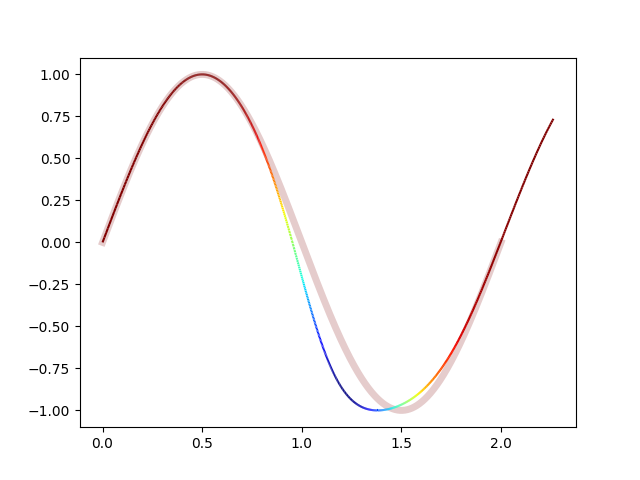

In [1316]:
wavelengths_norm = (wavelengths-min(wavelengths))/(max(wavelengths)-min(wavelengths))
colors = plt.cm.jet(wavelengths_norm)

plt.figure()
z0 = np.linspace(z[0], z[-1], 1000)
plt.plot(z0 , np.sin(2 * np.pi * 1/wavelengths[0] * z0 ), color = colors[0], linewidth = 5, alpha = 0.2)

for idx, wavelength in enumerate(wavelengths[:-1]):
    s_idx = np.linspace(s[idx], s[idx+1], 100)
    plt.plot(s_idx, np.sin(2 * np.pi * 1/wavelengths[idx] * s_idx), color = colors[idx], linestyle = '--')
